###  Flight Infomation Region (FIR)

Specific region of airspace in which a flight information service and alerting service (ALRS) are provided
    - ICAO (international civil aviation organization): delegates which country is responsible for the operational control of a given  FIR.
    - Smaller countries airspace is encompasssed by a single FIR; larger contries airspace is subdivided into a number of regional FIRs.

The data contain the following tables:
- `ECTL\_ID`: As in Flights file
  - `numbe_of_flights = flight_firs['ECTRL ID'].unique()` is equivalent to the number of flights in "Flights" file
- `Sequence Number` > Numeric sequence number of the airspace entered by the flight in chronological order
- `FIR ID`: The identifier of the FIR
  - In some cases there is a vertical division of the FIR, in which case the lower portion remains named as such, wherease the airspace above is termed an upper information region (UIR)
- `Entry Time`: Time (UTC) the flight entered the airspace
- `Exit Time`: Time (UTC) the flight exited the airspace

In [3]:
import pandas as pd

# Load the data from the uploaded file
file_actual_firs = './Eurocontrol_data/202112/Flight_FIRs_Actual_20211201_20211231.csv'

file_filed_firs = './Eurocontrol_data/202112/Flight_FIRs_Filed_20211201_20211231.csv'

actual_firs_df = pd.read_csv(file_actual_firs)
filed_firs_df = pd.read_csv(file_filed_firs)

actual_firs_df.head(12)


,ECTRL ID,Sequence Number,FIR ID,Entry Time,Exit Time
0,248113105,0,TAXI_OUT,01-12-2021 00:12:00,01-12-2021 00:37:00
1,248113105,1,KZAUFIR,01-12-2021 00:37:00,01-12-2021 00:46:52
2,248113105,2,KZAUUIR,01-12-2021 00:46:52,01-12-2021 00:57:38
3,248113105,3,KZOBUIR,01-12-2021 00:57:38,01-12-2021 01:10:32
4,248113105,4,CZYZFIR,01-12-2021 01:10:32,01-12-2021 01:48:47
5,248113105,5,CZULFIR,01-12-2021 01:48:47,01-12-2021 02:59:50
6,248113105,6,CZQXFIR,01-12-2021 02:59:50,01-12-2021 05:21:58
7,248113105,7,EGGXFIR,01-12-2021 05:21:58,01-12-2021 06:39:18
8,248113105,8,EISNUIR,01-12-2021 06:39:18,01-12-2021 06:59:56
9,248113105,9,EGTTUIR,01-12-2021 06:59:56,01-12-2021 07:19:16


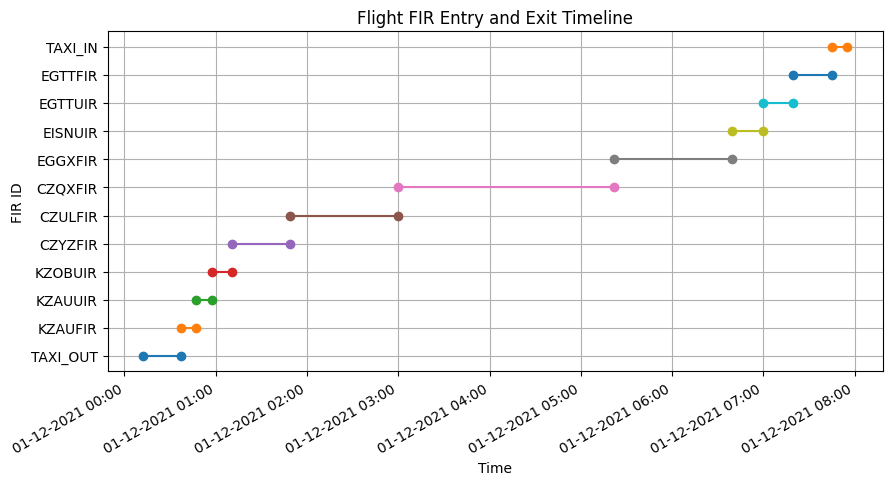

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# sample one flight
# select flight from ECTRL ID column
flight_id =  actual_firs_df['ECTRL ID'].unique()[0]
sample_flight = actual_firs_df[actual_firs_df['ECTRL ID'] == flight_id]


sample_flight.loc[:, 'Entry Time'] = pd.to_datetime(sample_flight['Entry Time'], format='%d-%m-%Y %H:%M:%S')
sample_flight.loc[:, 'Exit Time'] = pd.to_datetime(sample_flight['Exit Time'], format='%d-%m-%Y %H:%M:%S')

# Plot the FIR entry and exit timeline
plt.figure(figsize=(10, 5))
for _, row in sample_flight.iterrows():
    plt.plot([row['Entry Time'], row['Exit Time']], [row['FIR ID'], row['FIR ID']], marker = 'o')

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotate date labels

plt.title('Flight FIR Entry and Exit Timeline')
plt.xlabel('Time')
plt.ylabel('FIR ID')
plt.grid(True)
plt.show()


In [3]:
# Group by flight ID, so it would be compatible with Flight file
actual_firs_grouped = actual_firs_df.groupby('ECTRL ID').agg({'FIR ID': list, 'Entry Time': list, 'Exit Time': list})
filed_firs_grouped = filed_firs_df.groupby('ECTRL ID').agg({'FIR ID': list, 'Entry Time': list, 'Exit Time': list})

# merge the two dataframes
flight_firs = pd.merge(actual_firs_grouped, filed_firs_grouped, on='ECTRL ID', suffixes=('_actual', '_filed'))

# Check if the FIRs filed and actual are different: possible diversion?
flight_firs['FIR ID_diff']= flight_firs['FIR ID_actual'] != flight_firs['FIR ID_filed']

flight_firs.head()

,FIR ID_actual,Entry Time_actual,Exit Time_actual,FIR ID_filed,Entry Time_filed,Exit Time_filed,FIR ID_diff
ECTRL ID,,,,,,,
248113105,"[TAXI_OUT, KZAUFIR, KZAUUIR, KZOBUIR, CZYZFIR,...","[01-12-2021 00:12:00, 01-12-2021 00:37:00, 01-...","[01-12-2021 00:37:00, 01-12-2021 00:46:52, 01-...","[TAXI_OUT, KZAUFIR, KZAUUIR, KZOBUIR, CZYZFIR,...","[01-12-2021 00:00:00, 01-12-2021 00:25:00, 01-...","[01-12-2021 00:25:00, 01-12-2021 00:32:50, 01-...",False
248113106,"[TAXI_OUT, OLBBFIR, OLBBUIR, LCCCFIR, LTAAFIR,...","[01-12-2021 00:33:00, 01-12-2021 00:43:00, 01-...","[01-12-2021 00:43:00, 01-12-2021 00:51:32, 01-...","[TAXI_OUT, OLBBFIR, OLBBUIR, LCCCFIR, LTAAFIR,...","[01-12-2021 00:30:00, 01-12-2021 00:40:00, 01-...","[01-12-2021 00:40:00, 01-12-2021 00:48:39, 01-...",False
248113107,"[TAXI_OUT, UGGGFIR, UGGGUIR, LTAAFIR, LTBBFIR,...","[01-12-2021 00:27:00, 01-12-2021 00:37:00, 01-...","[01-12-2021 00:37:00, 01-12-2021 00:45:25, 01-...","[TAXI_OUT, UGGGFIR, UGGGUIR, LTAAFIR, LTBBFIR,...","[01-12-2021 00:30:00, 01-12-2021 00:40:00, 01-...","[01-12-2021 00:40:00, 01-12-2021 00:48:24, 01-...",False
248113108,"[TAXI_OUT, LIMMFIR, LIMMUIR, LIRRUIR, LIRRFIR,...","[01-12-2021 00:34:00, 01-12-2021 00:42:00, 01-...","[01-12-2021 00:42:00, 01-12-2021 01:05:39, 01-...","[TAXI_OUT, LIMMFIR, LIMMUIR, LIRRUIR, LIRRFIR,...","[01-12-2021 00:34:00, 01-12-2021 00:42:00, 01-...","[01-12-2021 00:42:00, 01-12-2021 01:01:13, 01-...",False
248113109,"[TAXI_OUT, HAAAFIR, HSSSUIR, HECCFIR, LGGGUIR,...","[01-12-2021 01:22:27, 01-12-2021 01:32:27, 01-...","[01-12-2021 01:32:27, 01-12-2021 02:18:40, 01-...","[TAXI_OUT, HAAAFIR, HSSSUIR, HECCFIR, LGGGUIR,...","[01-12-2021 00:45:00, 01-12-2021 00:55:00, 01-...","[01-12-2021 00:55:00, 01-12-2021 01:37:00, 01-...",False


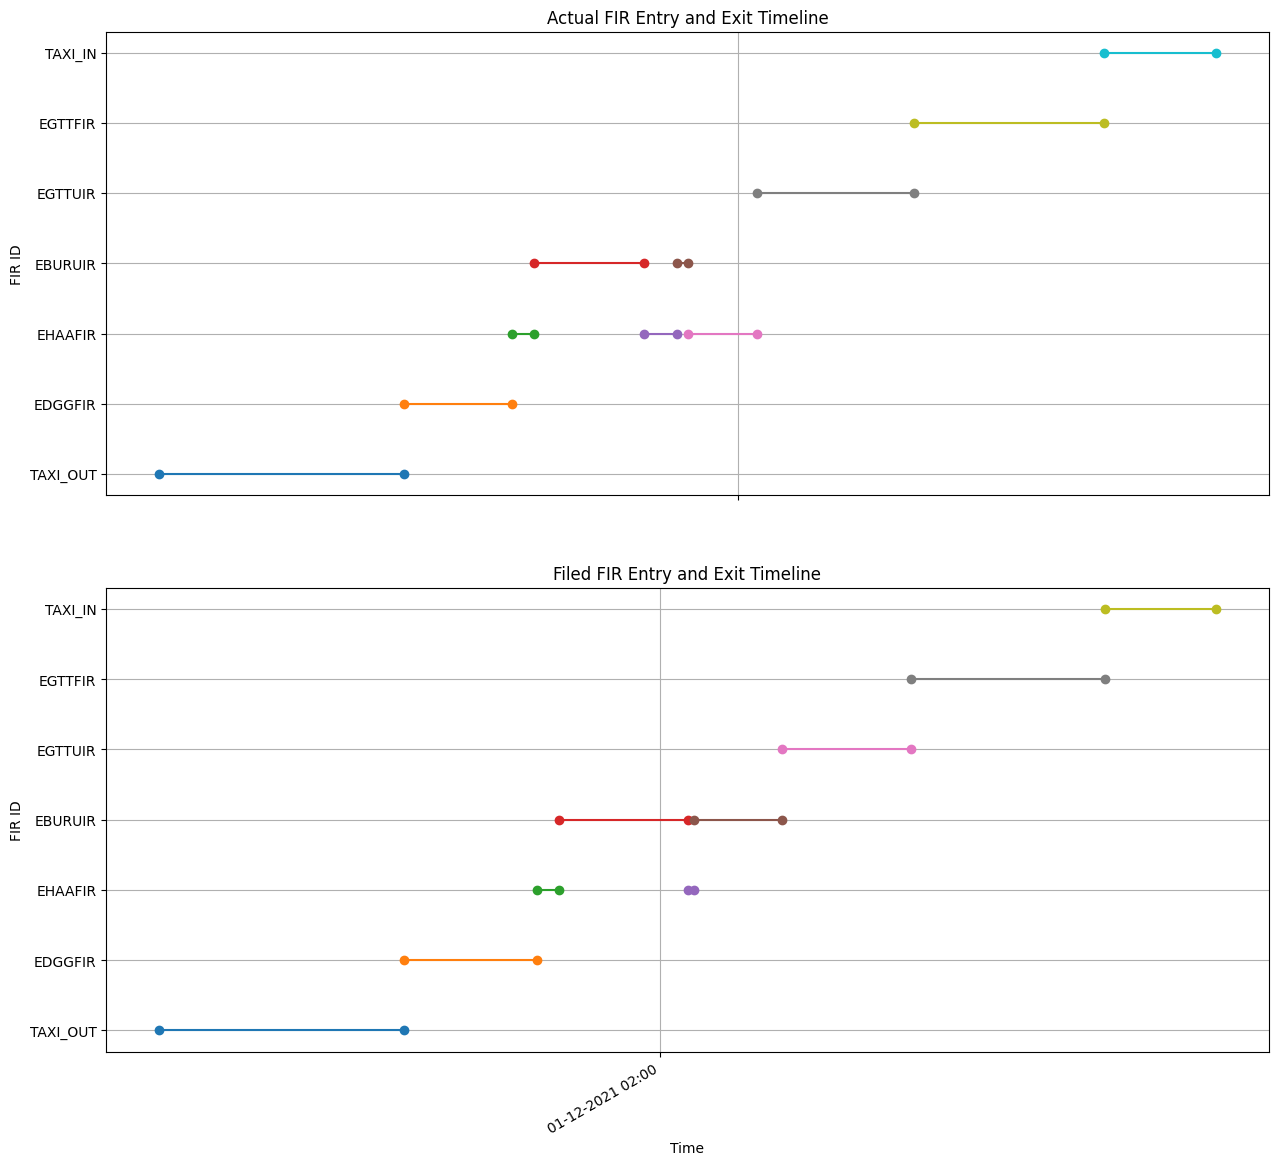

In [4]:

# plot the entries and exits of the FIRs of two flights with different filed and actual FIRs

# select flight from ECTRL ID column
flight_id =  flight_firs[flight_firs['FIR ID_diff'] == True].index[1]
sample_flight_actual = actual_firs_df[actual_firs_df['ECTRL ID'] == flight_id]
sample_flight_filed = filed_firs_df[filed_firs_df['ECTRL ID'] == flight_id]

sample_flight_actual.loc[:, 'Entry Time'] = pd.to_datetime(sample_flight_actual['Entry Time'], format='%d-%m-%Y %H:%M:%S')
sample_flight_actual.loc[:, 'Exit Time'] = pd.to_datetime(sample_flight_actual['Exit Time'], format='%d-%m-%Y %H:%M:%S')

sample_flight_filed.loc[:, 'Entry Time'] = pd.to_datetime(sample_flight_filed['Entry Time'], format='%d-%m-%Y %H:%M:%S')
sample_flight_filed.loc[:, 'Exit Time'] = pd.to_datetime(sample_flight_filed['Exit Time'], format='%d-%m-%Y %H:%M:%S')

# Plot the FIR entry and exit timeline, two subplots, side by side
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
for _, row in sample_flight_actual.iterrows():
    axs[0].plot([row['Entry Time'], row['Exit Time']], [row['FIR ID'], row['FIR ID']], marker = 'o')
for _, row in sample_flight_filed.iterrows():
    axs[1].plot([row['Entry Time'], row['Exit Time']], [row['FIR ID'], row['FIR ID']], marker = 'o')

# Formatting the plot
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
axs[0].xaxis.set_major_locator(mdates.HourLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels
axs[0].set_title('Actual FIR Entry and Exit Timeline')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('FIR ID')
axs[0].grid(True)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=1))
fig.autofmt_xdate()  # Rotate date labels
axs[1].set_title('Filed FIR Entry and Exit Timeline')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('FIR ID')
axs[1].grid(True)

plt.show()

In [5]:
# Statistical summary of the dataframe
## print the number of flights, i.e., unique ECTRL ID
numbe_of_flights = actual_firs_df['ECTRL ID'].unique()
print('Number of flights:', len(numbe_of_flights))

## print the number of FIRs, i.e., unique FIR
numbe_of_firs = actual_firs_df['FIR ID'].unique()
print('Number of FIRs:', len(numbe_of_firs))

## number of flights per FIR
flights_per_fir = actual_firs_df.groupby('FIR ID').size()
## print the highest 10 FIRs with the most flights and the lowest 10 FIRs with the least flights
print('The highest 10 FIRs with the most flights:', flights_per_fir.nlargest(10))
print('The lowest 10 FIRs with the least flights:', flights_per_fir.nsmallest(10))

##number of FIRs per flight
firs_per_flight = actual_firs_df.groupby('ECTRL ID').size()
## print the highest 10 flights with the most FIRs and the lowest 10 flights with the least FIRs
print('The highest 10 flights with the most FIRs:', firs_per_flight.nlargest(10))
print('The lowest 10 flights with the least FIRs:', firs_per_flight.nsmallest(10))


Number of flights: 570200
Number of FIRs: 309
The highest 10 FIRs with the most flights: FIR ID
TAXI_IN     570200
TAXI_OUT    570200
LFFFUIR     174197
EDUUUIR     144224
EGTTFIR     107155
EGTTUIR      98105
EHAAFIR      88200
LIMMUIR      85245
LOVVFIR      85074
LECMUIR      81331
dtype: int64
The lowest 10 FIRs with the least flights: FIR ID
KZAKFIR     1
PAZAFIR     2
UHMMFIR     3
KZKCFIR     6
HBBAFIR     9
WBFCFIR     9
ZJSAFIR    15
FWLLFIR    17
SCFZFIR    22
HBBAUIR    27
dtype: int64
The highest 10 flights with the most FIRs: ECTRL ID
248605198    48
248624169    42
248693757    42
248660131    41
248397719    40
248278813    39
248500172    39
248674995    39
248184269    38
248192122    38
dtype: int64
The lowest 10 flights with the least FIRs: ECTRL ID
248113134    3
248113136    3
248113147    3
248113183    3
248113193    3
248113194    3
248113195    3
248113197    3
248113206    3
248113212    3
dtype: int64


### Airspace

In [7]:

airspace_file= './Eurocontrol_data/202112/FIR_2112.csv'
airspace_data = pd.read_csv(airspace_file)

airspace_data.head(25)

,Airspace ID,Min Flight Level,Max Flight Level,Sequence Number,Latitude,Longitude
0,AGGGFIR,0,999,1,-4.83333,159.00000
1,AGGGFIR,0,999,2,-6.55000,156.03333
2,AGGGFIR,0,999,3,-6.66667,156.03333
3,AGGGFIR,0,999,4,-6.85000,155.91667
4,AGGGFIR,0,999,5,-6.93333,155.70000
5,AGGGFIR,0,999,6,-6.93333,155.60000
6,AGGGFIR,0,999,7,-7.31667,155.00000
7,AGGGFIR,0,999,8,-9.92778,155.00000
8,AGGGFIR,0,999,9,-12.00000,155.00000
9,AGGGFIR,0,999,10,-12.18667,155.00000


/tmp/ipykernel_197318/3793986429.py:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


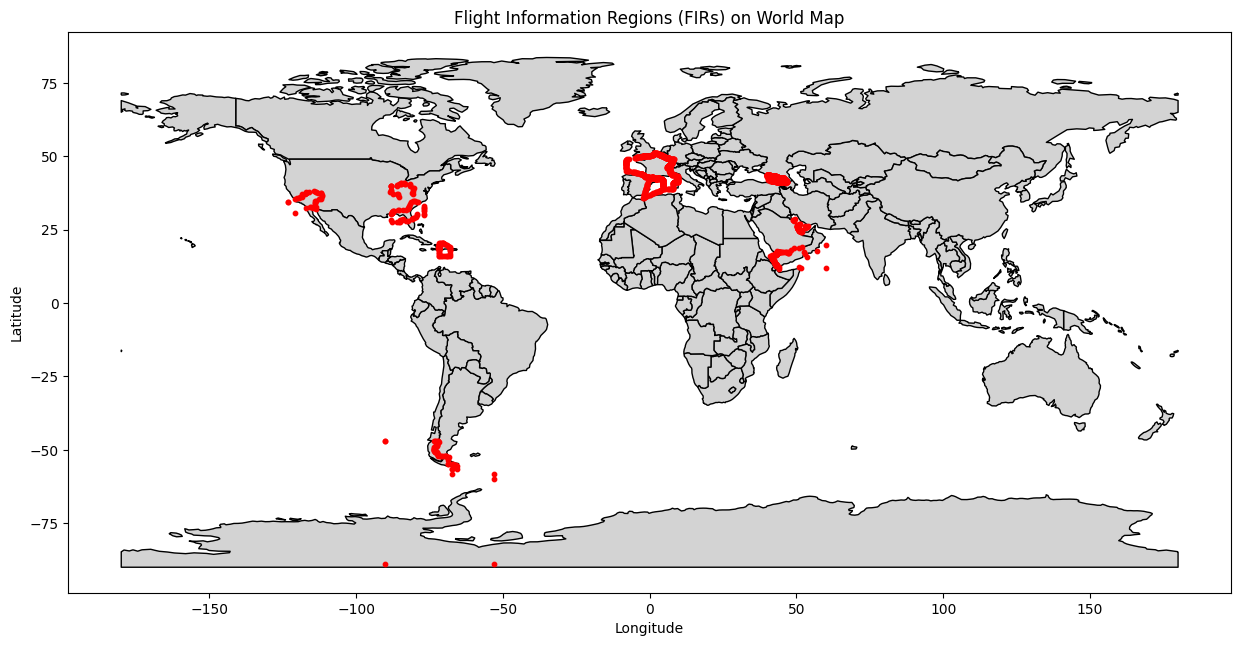

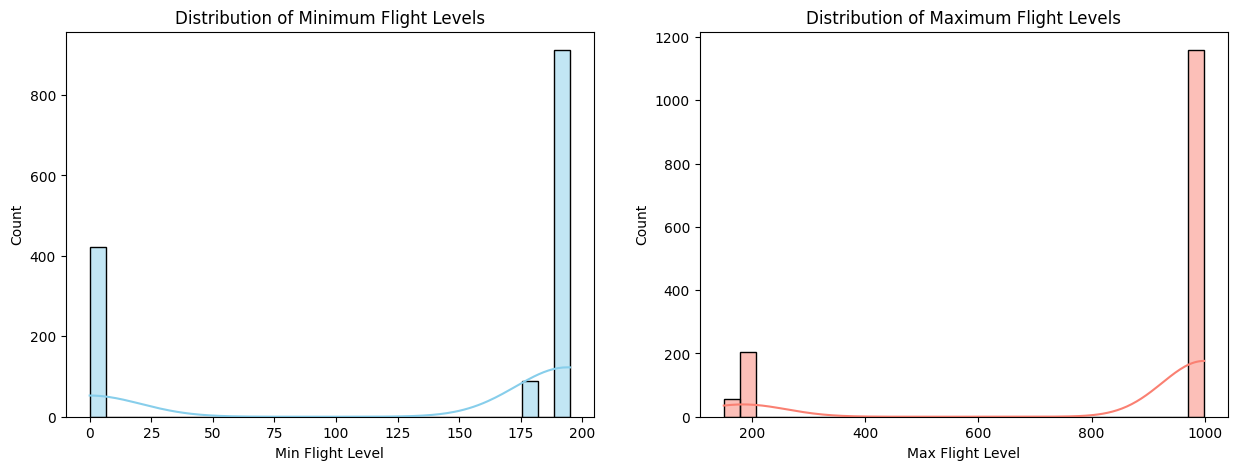

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Get unique Airspace IDs
unique_ids = airspace_data['Airspace ID'].unique()

# Sample 10 unique IDs
sampled_ids = np.random.choice(unique_ids, size=10, replace=False)

# Select all rows corresponding to the sampled IDs
sampled_data = airspace_data[airspace_data['Airspace ID'].isin(sampled_ids)]

# sample the data

# Converting the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(sampled_data, geometry=gpd.points_from_xy(sampled_data.Longitude, sampled_data.Latitude))

# World map to plot FIRs
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=10)
plt.title('Flight Information Regions (FIRs) on World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(sampled_data['Min Flight Level'], bins=30, ax=axs[0], kde=True, color='skyblue')
axs[0].set_title('Distribution of Minimum Flight Levels')
sns.histplot(sampled_data['Max Flight Level'], bins=30, ax=axs[1], kde=True, color='salmon')
axs[1].set_title('Distribution of Maximum Flight Levels')

# Show the plots
plt.show()
